# Data Analysis

## Librerias

### Instalacion

In [22]:
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy

### Importacion

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import folium

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

## Funciones

### Funcion boxplot precio - campo pivote

In [24]:
def fncGenerarBoxPlot(strCampoPrecio, strCampoPivote, strTitulo1, strTitulo2):
    # Obteniendo los diferentes subsets, para venta y alquiler.
    dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', [strCampoPrecio, strCampoPivote]]
    dfTemp1[strCampoPivote] = dfTemp1[strCampoPivote].astype('category')

    dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', [strCampoPrecio, strCampoPivote]]
    dfTemp2[strCampoPivote] = dfTemp2[strCampoPivote].astype('category')


    # Definiendo el lienzo como subplots de 2 filas y 1 columna
    fig, ax = plt.subplots(2, 1)

    # Definiendo tamano
    fig.set_figheight(10)
    fig.set_figwidth(10)

    # Generando la primera grafica (Alquiler)
    g1 = sns.boxplot(y=strCampoPrecio, x=strCampoPivote, data=dfTemp1, ax=ax[0], palette = 'GnBu_d')
    #g1.set(xticklabels=[])
    g1.set(title=strTitulo1)
    g1.set(xlabel=None)

    # Generando la segunda grafica (Venta)
    g2 = sns.boxplot(y=strCampoPrecio, x=strCampoPivote, data=dfTemp2, ax=ax[1], palette = 'Blues')
    #g2.set(xticklabels=[])
    g2.set(title=strTitulo2)
    #g2.set(xlabel=None)

    return(plt)

### Funcion scatterplot precio - campo pivote

In [25]:
def fncGenerarScatterPlot(strCampoPrecio, strCampoPivote, strTitulo1, strTitulo2):
    # Obteniendo los subsets a evaluar
    dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', [strCampoPrecio, strCampoPivote]]
    dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', [strCampoPrecio, strCampoPivote]]

    # Definiendo el lienzo como subplots de 2 filas y 1 columna
    fig, ax = plt.subplots(2, 1)

    # Definiendo tamano
    fig.set_figheight(10)
    fig.set_figwidth(10)

    # Se genera la primera grafica
    g1 = sns.scatterplot(x = strCampoPivote, y = strCampoPrecio, data=dfTemp1, ax = ax[0])
    g1.set(title = strTitulo1)

    # Se genera la segunda grafica
    g2 = sns.scatterplot(x = strCampoPivote, y = strCampoPrecio, data=dfTemp2, ax = ax[1])
    g2.set(title = strTitulo2)

    return(plt)

### Funcion para construir modelo KMeans

In [26]:
def fncConstruirModeloKMeans(intKClusters, listColores, dfTemp1, factorRadio):
    
    # Se obtienen los valores que se utilizaran para la construccion de modelo KMeans
    X = np.array(list(zip(dfTemp1['longitud'], dfTemp1['latitud']))).reshape(len(dfTemp1['longitud']), 2)

    # Construccion del modelo
    kmeanModel = KMeans(n_clusters = intKClusters, max_iter = 2000).fit(X)

    # Asignacion de clusters a registros
    dfTemp1['cluster'] = kmeanModel.labels_

    # Creacion del mapa ubicado en ciudad de Guatemala
    m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

    # Agregando marcadores circules
    for i in range(0,len(dfTemp1['precio_real'])):
        folium.Circle(
            location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
            popup=str(dfTemp1.iloc[i]['precio_real']) + '[' + str(dfTemp1.iloc[i]['cluster']) + ']'+ '\n' 
                + dfTemp1.iloc[i]['linkpagina'],
            radius=(dfTemp1.iloc[i]['precio_real']/(factorRadio * dfTemp1.iloc[i]['espacio_m2'])),
            color=listColores[dfTemp1.iloc[i]['cluster']],
            fill=True,
            fill_color=listColores[dfTemp1.iloc[i]['cluster']]).add_to(m)

    # Regresamos el objeto mapa
    return(m)

## Lectura Datos

In [27]:
dfFinalSet = pd.read_csv('FinalSet.csv', dtype = {'codigoencabezado': 'int32'})

dfFinalSet.describe(include = 'all')

codigoencabezado    idregistro  \
count        2918.000000  2.918000e+03   
unique               NaN           NaN   
top                  NaN           NaN   
freq                 NaN           NaN   
mean         1460.194311  1.095548e+09   
std           842.866093  1.460999e+07   
min             1.000000  9.637780e+08   
25%           730.250000  1.100263e+09   
50%          1460.500000  1.100372e+09   
75%          2189.750000  1.100398e+09   
max          2919.000000  1.100426e+09   

                                               linkpagina fecharegistro  \
count                                                2918          2918   
unique                                               1543            10   
top     https://www.olx.com.gt/item/alquiler-apartamen...    2020-06-10   
freq                                                   11           550   
mean                                                  NaN           NaN   
std                                                   NaN           NaN   
min                                                   NaN           NaN   
25%                                                   NaN           NaN   
50%                                                   NaN           NaN   
75%                                                   NaN           NaN   
max                                                   NaN           NaN   

        administracion amueblado         antiguedad        banos  \
count       612.000000      1779               1405  2916.000000   
unique             NaN         2                  8          NaN   
top                NaN        No  Entre 5 y 10 años          NaN   
freq               NaN      1395                441          NaN   
mean        808.816993       NaN                NaN     1.945816   
std        4543.787512       NaN                NaN     0.917046   
min           0.000000       NaN                NaN     0.000000   
25%           0.000000       NaN                NaN     1.000000   
50%           0.000000       NaN                NaN     2.000000   
75%         650.000000       NaN                NaN     2.000000   
max       65546.000000       NaN                NaN    10.000000   

        habitaciones estudio  ...  moneda         tipo  tipo_vendedor  \
count    2904.000000    2904  ...    2918         2915           2403   
unique           NaN       2  ...       2            4              2   
top              NaN      No  ...     US$  Apartamento   Inmobiliaria   
freq             NaN    2887  ...    1814         2849           2003   
mean        2.308884     NaN  ...     NaN          NaN            NaN   
std         0.810271     NaN  ...     NaN          NaN            NaN   
min         1.000000     NaN  ...     NaN          NaN            NaN   
25%         2.000000     NaN  ...     NaN          NaN            NaN   
50%         2.000000     NaN  ...     NaN          NaN            NaN   
75%         3.000000     NaN  ...     NaN          NaN            NaN   
max        10.000000     NaN  ...     NaN          NaN            NaN   

          favoritos                                titulo  \
count   2918.000000                                  2918   
unique          NaN                                  1450   
top             NaN  ALQUILO APARTAMENTO EN VILLA CANALES   
freq            NaN                                    14   
mean       2.209390                                   NaN   
std       13.218336                                   NaN   
min        0.000000                                   NaN   
25%        0.000000                                   NaN   
50%        1.000000                                   NaN   
75%        2.000000                                   NaN   
max      642.000000                                   NaN   

                   fecha_creacion               valido_hasta  \
count                        2918                       2918   
unique                       1665              

## Data Wrangling

### Conversion Series

In [28]:
dfAnalisisSet = dfFinalSet.astype({'codigoencabezado': 'str', 
                                'idregistro': 'str',
                                'partner_code': 'str',
                                'user_id': 'str'
                               })

dfAnalisisSet['fecharegistro'] = pd.to_datetime(dfAnalisisSet['fecharegistro'], format = "%Y-%m-%d")

dfAnalisisSet.describe(include = 'all')

codigoencabezado  idregistro  \
count              2918        2918   
unique             2918        1530   
top                 613  1100204191   
freq                  1          11   
first               NaN         NaN   
last                NaN         NaN   
mean                NaN         NaN   
std                 NaN         NaN   
min                 NaN         NaN   
25%                 NaN         NaN   
50%                 NaN         NaN   
75%                 NaN         NaN   
max                 NaN         NaN   

                                               linkpagina  \
count                                                2918   
unique                                               1543   
top     https://www.olx.com.gt/item/alquiler-apartamen...   
freq                                                   11   
first                                                 NaN   
last                                                  NaN   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

              fecharegistro  administracion amueblado         antiguedad  \
count                  2918      612.000000      1779               1405   
unique                   10             NaN         2                  8   
top     2020-06-10 00:00:00             NaN        No  Entre 5 y 10 años   
freq                    550             NaN      1395                441   
first   2020-05-14 00:00:00             NaN       NaN                NaN   
last    2020-06-20 00:00:00             NaN       NaN                NaN   
mean                    NaN      808.816993       NaN                NaN   
std                     NaN     4543.787512       NaN                NaN   
min                     NaN        0.000000       NaN                NaN   
25%                     NaN        0.000000       NaN                NaN   
50%                     NaN        0.000000       NaN                NaN   
75%                     NaN      650.000000       NaN                NaN   
max                     NaN    65546.000000       NaN                NaN   

              banos  habitaciones estudio  ...  moneda         tipo  \
count   2916.000000   2904.000000    2904  ...    2918         2915   
unique          NaN           NaN       2  ...       2            4   
top             NaN           NaN      No  ...     US$  Apartamento   
freq            NaN           NaN    2887  ...    1814         2849   
first           NaN           NaN     NaN  ...     NaN          NaN   
last            NaN           NaN     NaN  ...     NaN          NaN   
mean       1.945816      2.308884     NaN  ...     NaN          NaN   
std        0.917046      0.810271     NaN  ...     NaN          NaN   
min        0.000000      1.000000     NaN  ...     NaN          NaN   
25%        1.000000      2.000000     NaN  ...     NaN          NaN   
50%        2.000000      2.000000     NaN  ...     NaN          NaN   
75%        2.000000      3.000000     NaN  ...     NaN          NaN   
max       10.000000     10.000000     NaN  ...     NaN          NaN   

        tipo_vendedor    favoritos                                titulo  \
count            2403  2918.000000                                  2918   
unique              2          NaN                                  1450   
top      Inmobiliaria          NaN  ALQUILO APARTAMENTO EN VILLA CANALES   
freq             2003          NaN                                    14   
first             NaN          NaN                                   NaN   
last              NaN          NaN                                   NaN   
mean         

### Registros Unicos
Se obtendran solo los ultimos registros obtenidos para cada id de registro (idregistro) utilizando el campo fecharegistro.

In [29]:
dfAnalisisSet = dfAnalisisSet.loc[dfAnalisisSet.reset_index().groupby(['idregistro'])['fecharegistro'].idxmax()]

dfAnalisisSet.head(10)

codigoencabezado  idregistro  \
1630             1632  1007688385   
974               976  1014321966   
975               977  1014324725   
965               967  1015576872   
556               557  1023789298   
557               558  1023944274   
559               560  1029720345   
2219             2221  1030164820   
578               579  1030987380   
2552             2553  1033662607   

                                             linkpagina fecharegistro  \
1630  https://www.olx.com.gt/item/venta-apartamento-...    2020-06-10   
974   https://www.olx.com.gt/item/apartamentos-y-ofi...    2020-05-30   
975   https://www.olx.com.gt/item/apartamentos-nuevo...    2020-05-30   
965   https://www.olx.com.gt/item/amplio-apartamento...    2020-05-30   
556   https://www.olx.com.gt/item/alquilo-apartament...    2020-05-25   
557   https://www.olx.com.gt/item/vendo-apartamento-...    2020-05-25   
559   https://www.olx.com.gt/item/vendo-apartamento-...    2020-05-25   
2219  https://www.olx.com.gt/item/vendo-apartamento-...    2020-06-15   
578   https://www.olx.com.gt/item/alquilo-renta-apar...    2020-05-25   
2552  https://www.olx.com.gt/item/se-alquila-apartam...    2020-06-20   

      administracion amueblado         antiguedad  banos  habitaciones  \
1630             NaN       NaN  Entre 5 y 10 años    3.0           3.0   
974              NaN       NaN    En construcción    2.0           1.0   
975              NaN       NaN         A estrenar    2.0           2.0   
965              NaN        No  Entre 5 y 10 años    2.0           2.0   
556              NaN        No                NaN    2.0           3.0   
557              NaN       NaN                NaN    2.0           2.0   
559              NaN       NaN                NaN    2.0           3.0   
2219             NaN       NaN                NaN    2.0           2.0   
578              NaN        No                NaN    1.0           2.0   
2552             NaN        No                NaN    3.0           3.0   

     estudio  ...  moneda         tipo  tipo_vendedor favoritos  \
1630      No  ...     US$  Apartamento   Inmobiliaria         6   
974       No  ...     US$  Apartamento   Inmobiliaria         1   
975       No  ...     US$  Apartamento   Inmobiliaria        28   
965       No  ...       Q  Apartamento   Inmobiliaria        13   
556       No  ...     US$  Apartamento   Inmobiliaria         1   
557       No  ...     US$  Apartamento   Inmobiliaria         0   
559       No  ...     US$  Apartamento   Inmobiliaria         4   
2219      No  ...     US$  Apartamento   Inmobiliaria         0   
578       No  ...     US$  Apartamento   Inmobiliaria         1   
2552      No  ...     US$  Apartamento   Inmobiliaria         1   

                                                 titulo  \
1630                          VENTA APARTAMENTO ZONA 10   
974   Apartamentos y Oficinas en Diagonal 6 zona 10,...   
975   Apartamentos NUEVOS 2 y 3 dormitorios Vista He...   
965   Amplio Apartamento alquilado en Jardines de La...   
556   ALQUILO APARTAMENTO EN ZONA 16undefined#x2F;ACODI   
557   VENDO APARTAMENTO EN AIRALI, ZONA 10 OPCIÓN 2u...   
559   VENDO APARTAMENTO EN ACANTOS DE CAYALA, ZONA 1...   
2219       VENDO APARTAMENTO EN AIRALI, ZONA 10 / ACODI   
578   ALQUILO RENTA APARTAMENTO EN TIEPOLO KM. 18 CA...   
2552  Se alquila Apartamento en zona 16 en el sector...   

                 fecha_creacion               valido_hasta  \
1630  2020-06-07T15:50:39-06:00  2020-09-05T15:50:39-06:00   
974   2020-05-27T16:38:13-06:00  2020-08-25T16:38:13-06:00   
975   2020-05-27T16:34:58-06:00  2020-08-25T16:34:58-06:00   
965   2020-05-27T17:25:02-06:00  2020-08-25T17:25:02-06:00   
556   2020-05-23T14:54:00-06:00  2020-08-21T14:54:00-06:00   
557   2020-05-23T14:49:40-06:00  2020-08-21T14:49:40-06:00   
559   2020-05-23T14:20:53-06:00  2020-08-21T14:20:53-06:00   
2219  2020-06-11T14:35:58-06:00  2020-09-09T14:35:58-06:00   
578   2020-05-22T19:20:27-06:00 

### Cambio Moneda Precio

In [30]:
cambio_moneda = 7.69
dfAnalisisSet['precio_real'] = np.where(dfAnalisisSet['moneda'] == 'US$', dfAnalisisSet['precio'] * cambio_moneda, 
                                        dfAnalisisSet['precio'])

dfAnalisisSet.head(10)

codigoencabezado  idregistro  \
1630             1632  1007688385   
974               976  1014321966   
975               977  1014324725   
965               967  1015576872   
556               557  1023789298   
557               558  1023944274   
559               560  1029720345   
2219             2221  1030164820   
578               579  1030987380   
2552             2553  1033662607   

                                             linkpagina fecharegistro  \
1630  https://www.olx.com.gt/item/venta-apartamento-...    2020-06-10   
974   https://www.olx.com.gt/item/apartamentos-y-ofi...    2020-05-30   
975   https://www.olx.com.gt/item/apartamentos-nuevo...    2020-05-30   
965   https://www.olx.com.gt/item/amplio-apartamento...    2020-05-30   
556   https://www.olx.com.gt/item/alquilo-apartament...    2020-05-25   
557   https://www.olx.com.gt/item/vendo-apartamento-...    2020-05-25   
559   https://www.olx.com.gt/item/vendo-apartamento-...    2020-05-25   
2219  https://www.olx.com.gt/item/vendo-apartamento-...    2020-06-15   
578   https://www.olx.com.gt/item/alquilo-renta-apar...    2020-05-25   
2552  https://www.olx.com.gt/item/se-alquila-apartam...    2020-06-20   

      administracion amueblado         antiguedad  banos  habitaciones  \
1630             NaN       NaN  Entre 5 y 10 años    3.0           3.0   
974              NaN       NaN    En construcción    2.0           1.0   
975              NaN       NaN         A estrenar    2.0           2.0   
965              NaN        No  Entre 5 y 10 años    2.0           2.0   
556              NaN        No                NaN    2.0           3.0   
557              NaN       NaN                NaN    2.0           2.0   
559              NaN       NaN                NaN    2.0           3.0   
2219             NaN       NaN                NaN    2.0           2.0   
578              NaN        No                NaN    1.0           2.0   
2552             NaN        No                NaN    3.0           3.0   

     estudio  ...         tipo  tipo_vendedor  favoritos  \
1630      No  ...  Apartamento   Inmobiliaria          6   
974       No  ...  Apartamento   Inmobiliaria          1   
975       No  ...  Apartamento   Inmobiliaria         28   
965       No  ...  Apartamento   Inmobiliaria         13   
556       No  ...  Apartamento   Inmobiliaria          1   
557       No  ...  Apartamento   Inmobiliaria          0   
559       No  ...  Apartamento   Inmobiliaria          4   
2219      No  ...  Apartamento   Inmobiliaria          0   
578       No  ...  Apartamento   Inmobiliaria          1   
2552      No  ...  Apartamento   Inmobiliaria          1   

                                                 titulo  \
1630                          VENTA APARTAMENTO ZONA 10   
974   Apartamentos y Oficinas en Diagonal 6 zona 10,...   
975   Apartamentos NUEVOS 2 y 3 dormitorios Vista He...   
965   Amplio Apartamento alquilado en Jardines de La...   
556   ALQUILO APARTAMENTO EN ZONA 16undefined#x2F;ACODI   
557   VENDO APARTAMENTO EN AIRALI, ZONA 10 OPCIÓN 2u...   
559   VENDO APARTAMENTO EN ACANTOS DE CAYALA, ZONA 1...   
2219       VENDO APARTAMENTO EN AIRALI, ZONA 10 / ACODI   
578   ALQUILO RENTA APARTAMENTO EN TIEPOLO KM. 18 CA...   
2552  Se alquila Apartamento en zona 16 en el sector...   

                 fecha_creacion               valido_hasta  \
1630  2020-06-07T15:50:39-06:00  2020-09-05T15:50:39-06:00   
974   2020-05-27T16:38:13-06:00  2020-08-25T16:38:13-06:00   
975   2020-05-27T16:34:58-06:00  2020-08-25T16:34:58-06:00   
965   2020-05-27T17:25:02-06:00  2020-08-25T17:25:02-06:00   
556   2020-05-23T14:54:00-06:00  2020-08-21T14:54:00-06:00   
557   2020-05-23T14:49:40-06:00  2020-08-21T14:49:40-06:00   
559   2020-05-23T14:20:53-06:00  2020-08-21T14:20:53-06:00   
2219  2020-06-11T14:35:58-06:00  2020-09-09T14:35:58-06:00   
578   2020-05-22T19:20:27-06:00  2020-08-20T19:20:27-06:00   
2552  2020-06-06T00:20:41-06:00  2020-07-28T14:

### Columna Oferta
Se creara una columna que determine si la oferta es de alquiler o venta. Se utilizara el campo 

In [31]:
dfAnalisisSet['oferta'] = ['Venta' if precio > 50000 else 'Alquiler' for precio in dfAnalisisSet['precio_real']]

dfAnalisisSet.groupby(['oferta']).count()['codigoencabezado']

oferta
Alquiler    950
Venta       580
Name: codigoencabezado, dtype: int64

## Data Visualization

### Precio por apartamento amueblado

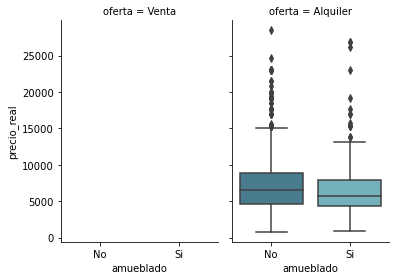

In [32]:
sns.catplot(x = 'amueblado', y = 'precio_real', 
            col = 'oferta', 
            kind = 'box', 
            data = dfAnalisisSet,
            palette = 'GnBu_d',
            height=4, 
            aspect=.7)

### Precio por antiguedad

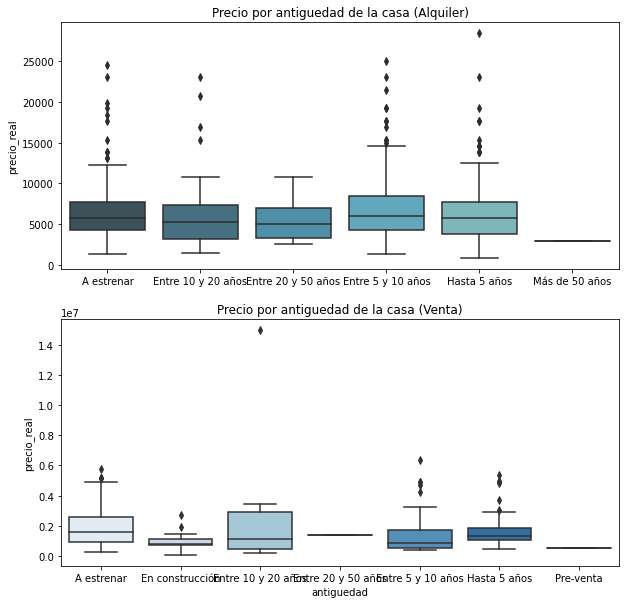

In [33]:
plt = fncGenerarBoxPlot('precio_real', 'antiguedad', 
                        'Precio por antiguedad de la casa (Alquiler)', 
                        'Precio por antiguedad de la casa (Venta)')
plt.show()


### Precio por moneda

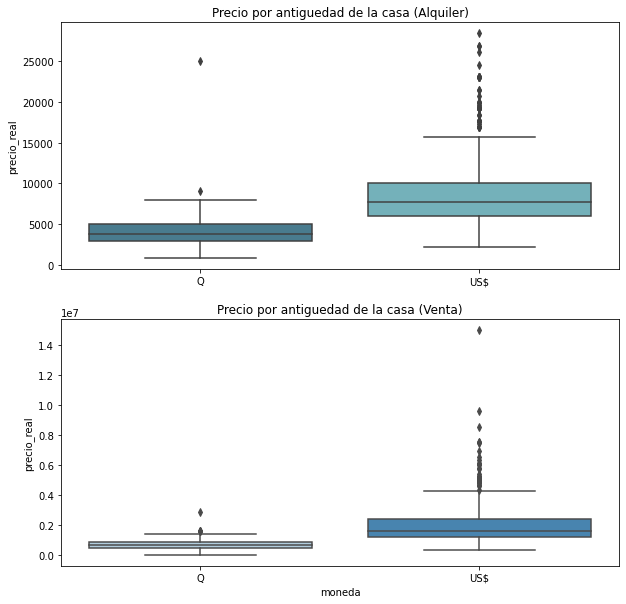

In [34]:
plt = fncGenerarBoxPlot('precio_real', 'moneda', 
                        'Precio por antiguedad de la casa (Alquiler)', 
                        'Precio por antiguedad de la casa (Venta)')
plt.show()

### Precio por banos

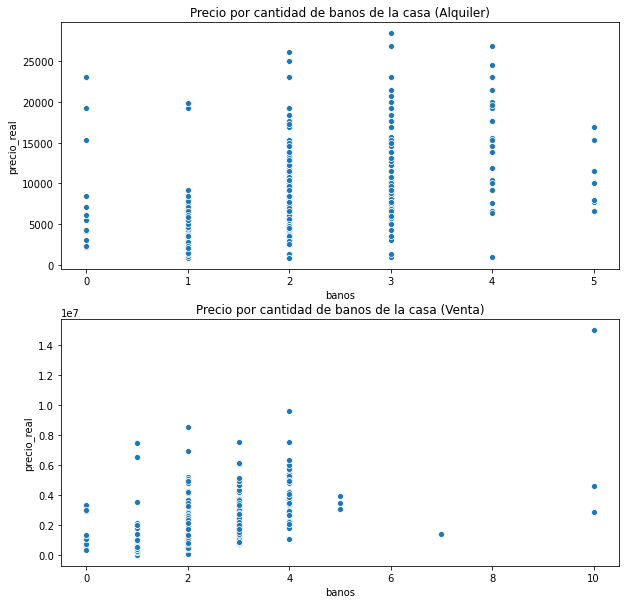

In [35]:
plt = fncGenerarScatterPlot('precio_real', 'banos', 
                            'Precio por cantidad de banos de la casa (Alquiler)',
                            'Precio por cantidad de banos de la casa (Venta)')

plt.show()

### Precio por habitaciones

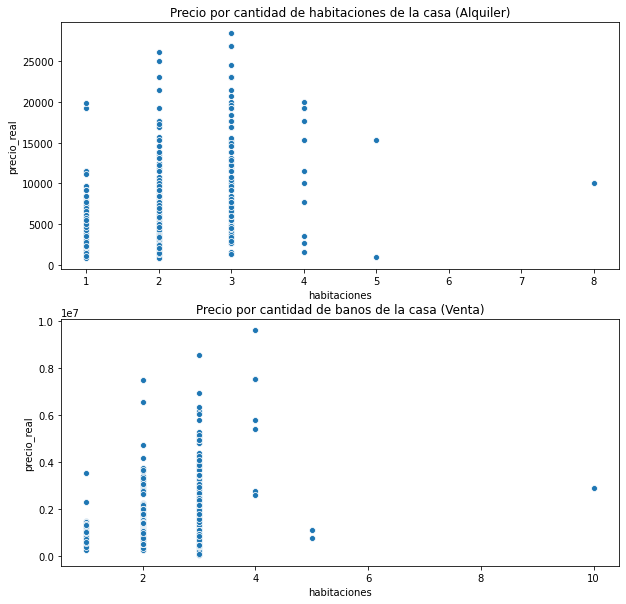

In [36]:
plt = fncGenerarScatterPlot('precio_real', 'habitaciones', 
                            'Precio por cantidad de habitaciones de la casa (Alquiler)',
                            'Precio por cantidad de banos de la casa (Venta)')

plt.show()

### Precio por espacio (m2)

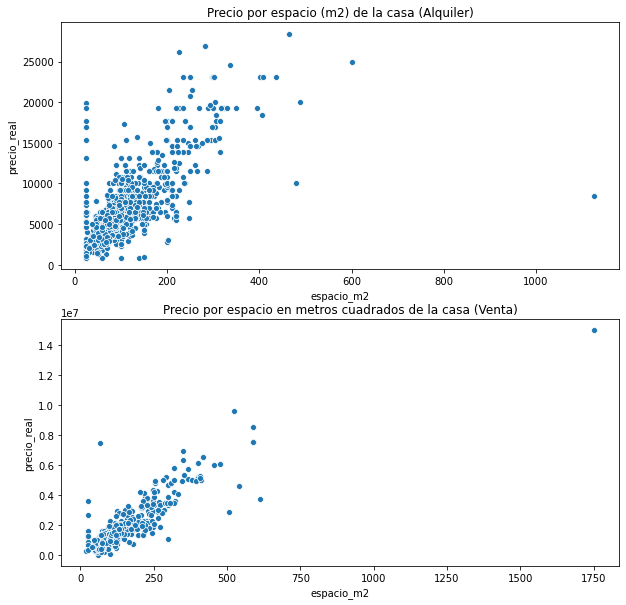

In [37]:
plt = fncGenerarScatterPlot('precio_real', 'espacio_m2', 
                            'Precio por espacio (m2) de la casa (Alquiler)',
                            'Precio por espacio en metros cuadrados de la casa (Venta)')

plt.show()

In [38]:
dfTemp = dfAnalisisSet.loc[(dfAnalisisSet['oferta'] == 'Venta') & (dfAnalisisSet['precio_real'] < 6000000) &
                          (dfAnalisisSet['espacio_m2'] > 500), ['codigoencabezado', 'espacio_m2', 'precio_real']]

dfTemp.head()

codigoencabezado  espacio_m2  precio_real
1898             1900       611.0    3729650.0
2198             2200       540.0    4614000.0
2160             2162       505.0    2900000.0

### Precio y ubicacion

In [39]:
# Creacion del mapa ubicado en ciudad de Guatemala
m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Agregando marcadores circules
for i in range(0,len(dfTemp1['precio_real'])):
    folium.Circle(
        location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
        popup=str(dfTemp1.iloc[i]['precio_real']) + dfTemp1.iloc[i]['linkpagina'],
        radius=(dfTemp1.iloc[i]['precio_real']/dfTemp1.iloc[i]['espacio_m2'])/ 5,
        color='blue',
        fill=True,
        fill_color='blue').add_to(m)


m

In [40]:
# Creacion del mapa ubicado en ciudad de Guatemala
m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Agregando marcadores circules
for i in range(0,len(dfTemp1['precio_real'])):
    folium.Circle(
        location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
        popup=str(dfTemp1.iloc[i]['precio_real']) + dfTemp1.iloc[i]['linkpagina'],
        radius=(dfTemp1.iloc[i]['precio_real']/dfTemp1.iloc[i]['espacio_m2'])/ 500,
        color='blue',
        fill=True,
        fill_color='blue').add_to(m)


m

### Precio por parqueo (tiene o no)

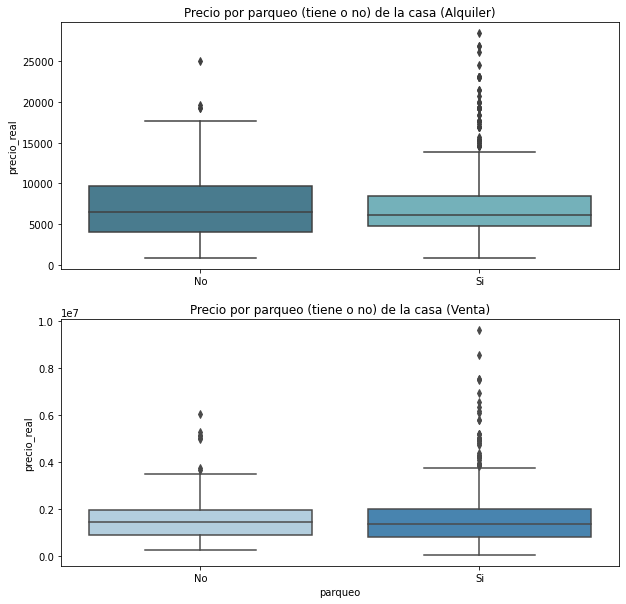

In [41]:
plt = fncGenerarBoxPlot('precio_real', 'parqueo', 
                        'Precio por parqueo (tiene o no) de la casa (Alquiler)', 
                        'Precio por parqueo (tiene o no) de la casa (Venta)')
plt.show()

### Precio por tipo(casa o apartamento)

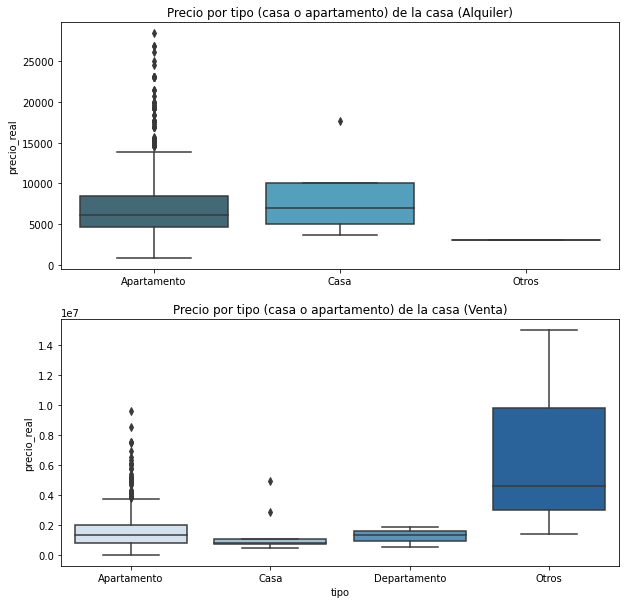

In [42]:
plt = fncGenerarBoxPlot('precio_real', 'tipo', 
                        'Precio por tipo (casa o apartamento) de la casa (Alquiler)', 
                        'Precio por tipo (casa o apartamento) de la casa (Venta)')
plt.show()

### Precio por tipo de vendedor

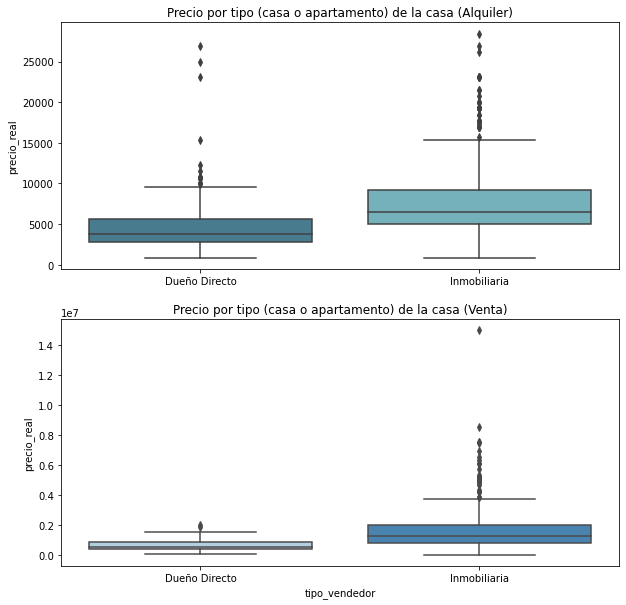

In [43]:
plt = fncGenerarBoxPlot('precio_real', 'tipo_vendedor', 
                        'Precio por tipo (casa o apartamento) de la casa (Alquiler)', 
                        'Precio por tipo (casa o apartamento) de la casa (Venta)')
plt.show()

### Precio por favoritos

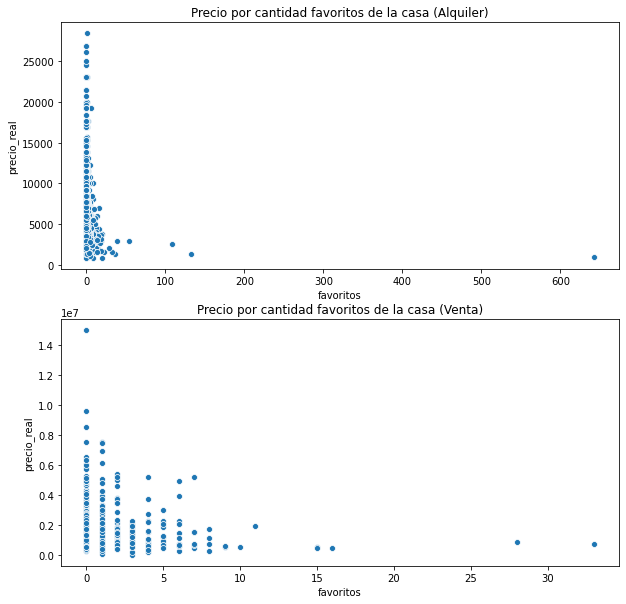

In [44]:
plt = fncGenerarScatterPlot('precio_real', 'favoritos', 
                            'Precio por cantidad favoritos de la casa (Alquiler)',
                            'Precio por cantidad favoritos de la casa (Venta)')

plt.show()

### Elbow - KMeans (Venta)

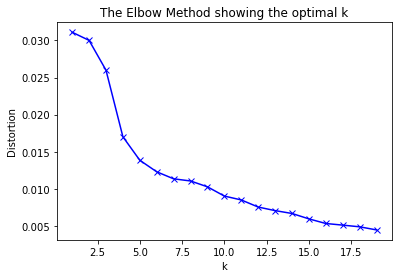

In [45]:
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

X = np.array(list(zip(dfTemp1['longitud'], dfTemp1['latitud']))).reshape(len(dfTemp1['longitud']), 2)

# Determinacion de valor K
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Precio Ubicacion Clusterizados (Venta)

In [46]:
# Seleccion de la cantidad de clusters
kClusters = 10

# Colores a utilizar
listaColores = [
    '#d50102',
    '#a6b401',
    '#e55b7e',
    '#00243f',
    '#216a61',
    '#005236',
    '#b94d5c',
    '#dc3080',
    'lightgray',
    'black'
]

# Filtrar dataframe a utilizar para analisis
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Construccion del mapa utilizando k-means
m = fncConstruirModeloKMeans(kClusters, listaColores, dfTemp1, 500)

# Mostrar mapa
m

### Precio Ubicacion Clusterizados (Alquiler)

In [47]:
# Seleccion de la cantidad de clusters
kClusters = 10

# Colores a utilizar
listaColores = [
    '#d50102',
    '#a6b401',
    '#e55b7e',
    '#00243f',
    '#216a61',
    '#005236',
    '#b94d5c',
    '#dc3080',
    'lightgray',
    'black'
]

# Filtrar dataframe a utilizar para analisis
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Construccion del mapa utilizando k-means
m = fncConstruirModeloKMeans(kClusters, listaColores, dfTemp1, 5)

# Mostrar mapa
m